In [1]:
#
# Generate Data
#
import sys; sys.path.append("../../scripts/")
import numpy as np
import copy
from generate_X import gen_data

k,n,m = 3,20,20
X = gen_data(R=k, shape=[n,m])["X"]

../../scripts/generate_X.py:71: UserWarning: Kruskal's theorem probably won't apply, may not have a unique nCPD.
  warnings.warn("Kruskal's theorem probably won't apply, may not have a unique nCPD.")


In [3]:
from TELF.factorization import NMFk

params = {
    "n_perturbs":32,
    "n_iters":1000,
    "epsilon":0.015,
    "n_jobs":-1,
    "init":"nnsvd",
    "use_gpu":False,
    "save_path":"../../results/",
    "save_output":True,
    "collect_output":True,
    "predict_k":True,
    "verbose":True,
    "transpose":False,
    "sill_thresh":0.9,
    "nmf_verbose":False,
    "nmf_method":'nmf_fro_mu',
    "pruned":True,
    "consensus_mat":True,
    "use_consensus_stopping":0,
    "mask":None
}
model = NMFk(**params)

Performing NMF with  nmf_fro_mu


/Users/maksim/opt/miniconda3/envs/TELF/lib/python3.8/site-packages/TELF-0.0.1-py3.8.egg/TELF/factorization/NMFk.py:392: UserWarning: calculate_error is True! Error calculation can make the runtime longer and take up more memory space!
/Users/maksim/opt/miniconda3/envs/TELF/lib/python3.8/site-packages/TELF-0.0.1-py3.8.egg/TELF/factorization/NMFk.py:396: UserWarning: predict_k is True with pvalue method! Predicting k can make the runtime significantly longer. Consider using predict_k_method='sill'.


In [4]:
Ks = range(1,11,1)
name = "Example_consensus"
note = "This is an example run of NMFk"
results = model.fit(X, Ks, name, note)
print(results.keys())

[Parallel(n_jobs=8)]: Using backend MultiprocessingBackend with 8 concurrent workers.
/Users/maksim/Desktop/Code/telf-public/.eggs/numpy-1.22.0-py3.8-macosx-10.9-x86_64.egg/numpy/lib/function_base.py:2829: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    9.1s remaining:    6.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:   11.3s finished


dict_keys(['time', 'k_predict', 'W', 'H'])


In [5]:
print(f"predicted k = {results['k_predict']}")

predicted k = 3


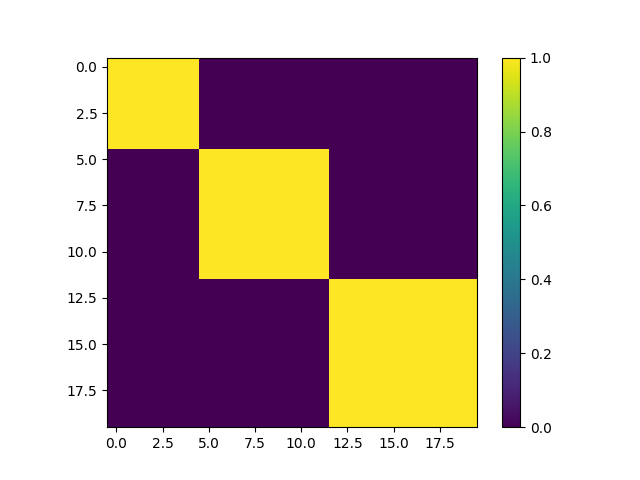

In [14]:
from IPython.display import Image
Image(filename='../../results/Example_consensus_32perts_1000iters_0.015eps_nnsvd-init/k_3_con_mat.png') 